### **Penambangan Data** 2023D <br>


1.   Nani Fitria Ramadhani (23031554013
2.   Ardina Shaifa Ramadhany (23031554027)
3.   Gisella Serafina Lukman M. (23031554215)


# **Analisis Survival pada Pasien Kanker Payudara**

In [ ]:
pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=9e942aa4282010911b66148a8190034540ddcd42d337d533fe0b780004341217
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import proportional_hazard_test
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



## 1. Load Dataset

In [ ]:
# Load data
data = pd.read_csv('NKI_cleaned.csv')
data.head()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,barcode,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,Contig19551,Contig47230_RC,Contig46501_RC,Contig20749_RC,AL157500,AL157502,Contig37376_RC,Contig45395_RC,X98307,AL157505,AB033027,Contig24026_RC,Contig27800_RC,Contig42500_RC,Contig7147,...,NM_001505,NM_001511,NM_002245,NM_018901,NM_002250,NM_001523,NM_018910,NM_000802,NM_002266,NM_001540,NM_002274,NM_001546,NM_002275,NM_002276,NM_001548,Contig51486_RC,NM_000824,NM_001554,NM_000826,NM_001555,NM_018942,NM_001565,NM_002299,NM_018950,NM_018952,Contig55606_RC,D25217,NM_000846,NM_000849,Contig29022_RC,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,25,0,2,3,1,6274,-0.413955,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,-0.565482,0.159871,0.198546,0.131750,0.600214,0.034498,0.492915,0.032284,0.020498,0.162939,-0.026182,0.090109,-0.110716,0.025322,0.690928,...,-0.129174,-0.440579,0.091784,-0.385110,-0.289255,-0.485699,-0.405309,-0.109878,-0.472279,-0.331498,-0.358591,-0.070151,-0.145741,-0.247676,-0.551571,-0.201436,-0.323253,-0.031295,-0.596451,-0.891091,-0.099162,-0.721029,-0.071294,-0.399346,0.393402,-0.301836,-0.271553,-0.383663,0.278246,-0.216583,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,20,0,3,3,1,6275,0.195251,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,0.118127,-0.183824,0.265609,-0.080799,-0.034788,0.146600,0.096864,0.043611,0.049600,0.150307,-0.150096,-0.082436,-0.117535,-0.245531,-0.070265,...,-0.208322,-0.375427,-0.564630,0.200229,-0.256182,-0.157249,0.165127,-0.321392,-0.218458,-0.026051,-0.170069,-0.201066,-0.490440,0.089429,-0.352569,0.007789,0.171152,-0.074320,0.716055,-0.489632,-0.237086,-0.074905,-0.122872,-0.020308,-0.250971,0.291171,-0.263896,-0.348006,-0.172679,0.224676,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,15,0,2,1,1,6276,0.596177,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,0.128750,0.403489,0.161287,0.030411,-0.074798,-0.190267,0.111516,-0.212994,-0.083166,0.363167,-0.202888,0.037665,-0.061916,0.082368,0.048723,...,0.179152,-0.470602,-0.080452,0.611942,-0.018856,0.170203,0.609129,-0.080603,-0.255806,-0.233129,0.251981,0.583411,0.827428,-1.056209,-0.068477,0.011319,-0.037401,-0.479714,0.774578,-0.256280,-0.010993,-0.445192,-0.191234,-0.088751,-0.200597,0.355198,-0.363763,-0.364457,0.211452,0.519197,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,15,1,2,3,1,6277,0.501286,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,-0.020820,-0.189779,-0.003238,0.450045,-0.024921,-0.187729,0.012188,-0.110403,-0.036232,-0.014174,-0.192298,-0.116583,-0.117127,-0.082694,-0.005107,...,-0.131830,-0.423847,-0.732862,-0.437769,-0.337763,-0.230526,-0.371917,-0.148544,-0.554392,-0.436530,-0.298767,-0.292425,-0.658711,0.188053,-0.361884,0.263228,0.155554,-0.136231,-0.139935,-0.646764,-0.231747,-0.461515,-0.231232,-0.180521,0.160247,-0.400131,-0.429229,-0.382146,0.189681,-0.115396,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,15,0,2,2,1,6278,-0.066771,-0.982276,-0.514666,-0.118483,-0.086523,-0.377659,-0.093353,0.302795,-0.794573,-0.001558,-0.210314,0.046650,-0.151043,-0.016541,-0.168022,0.048334,-0.049165,-0.060926,-0.060485,-0.061257,-0.018171,-0.057568,0.033263,0.070836,...,0.281523,-0.318070,-0.171916,0.064884,-0.261164,0.163015,0.057460,-0.190698,-0.144005,0.430455,-0.313115,0.141877,-0.7


## 2. Data Preprocessing


In [ ]:
# Menentukan kolom yang ingin diambil
ekstrak_kolom = [
    'eventdeath',
    'timerecurrence',
    'age',
    'chemo',
    'hormonal',
    'amputation',
    'histtype',
    'diam',
    'posnodes',
    'grade',
    'angioinv',
    'lymphinfil'
]

# Memilih kolom-kolom yang ditentukan
data = data[ekstrak_kolom]

In [ ]:
# Cek info data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   eventdeath      272 non-null    int64  
 1   timerecurrence  272 non-null    float64
 2   age             272 non-null    int64  
 3   chemo           272 non-null    int64  
 4   hormonal        272 non-null    int64  
 5   amputation      272 non-null    int64  
 6   histtype        272 non-null    int64  
 7   diam            272 non-null    int64  
 8   posnodes        272 non-null    int64  
 9   grade           272 non-null    int64  
 10  angioinv        272 non-null    int64  
 11  lymphinfil      272 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 25.6 KB
None


In [ ]:
data.head()

,eventdeath,timerecurrence,age,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil
0,0,14.817248,43,0,0,1,1,25,0,2,3,1
1,0,14.261465,48,0,0,0,1,20,0,3,3,1
2,0,6.644764,38,0,0,0,1,15,0,2,1,1
3,0,7.748118,50,0,1,0,1,15,1,2,3,1
4,0,6.318960,38,0,0,1,1,15,0,2,2,1


In [ ]:
# Cek missing values
print(data.isnull().sum())


eventdeath        0
timerecurrence    0
age               0
chemo             0
hormonal          0
amputation        0
histtype          0
diam              0
posnodes          0
grade             0
angioinv          0
lymphinfil        0
dtype: int64



## 3. Statistik Deskriptif
Melihat ringkasan statistik variabel numerik untuk memahami distribusi datanya.


In [ ]:
# Statistik deskriptif
data.describe()

,eventdeath,timerecurrence,age,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.283088,7.250433,44.047794,0.393382,0.132353,0.441176,1.110294,22.529412,1.341912,2.128676,1.647059,1.261029
std,0.451329,4.177462,5.464538,0.489401,0.339499,0.497443,0.545668,8.703345,2.108848,0.797821,0.876334,0.596629
min,0.000000,0.271047,26.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,4.389460,40.750000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,6.950034,45.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,2.000000,1.000000,1.000000
75%,1.000000,9.986311,49.000000,1.000000,0.000000,1.000000,1.000000,29.250000,2.000000,3.000000,3.000000,1.000000
max,1.000000,18.340862,53.000000,1.000000,1.000000,1.000000,7.000000,50.000000,13.000000,3.000000,3.000000,3.000000



## 4. Exploratory Data Analysis (EDA)


### 4.1 Histogram Survival
Distribusi variabel berdasarkan status kematian (eventdeath).

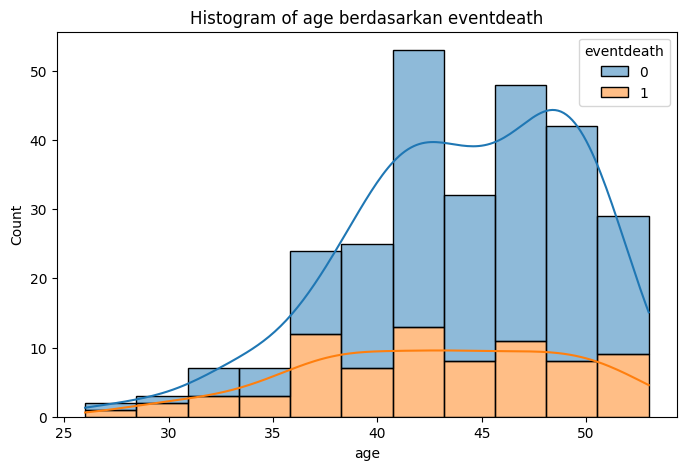

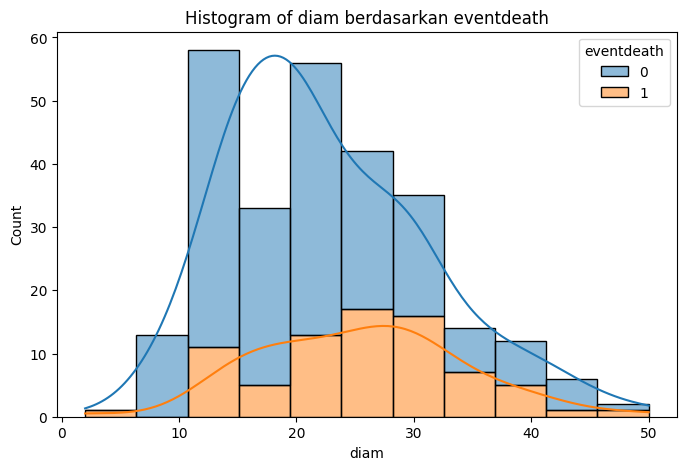

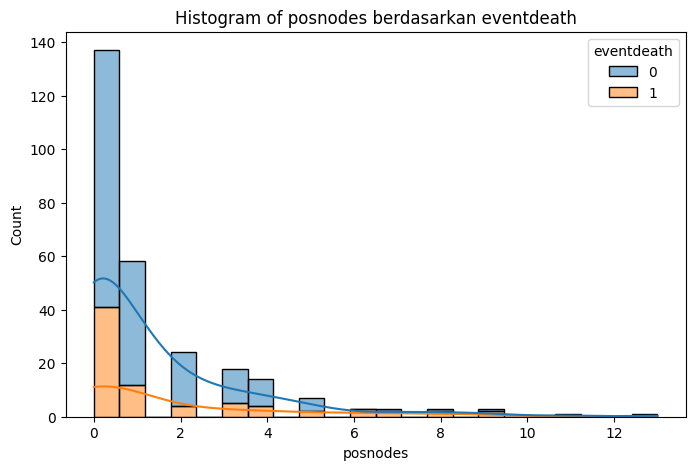

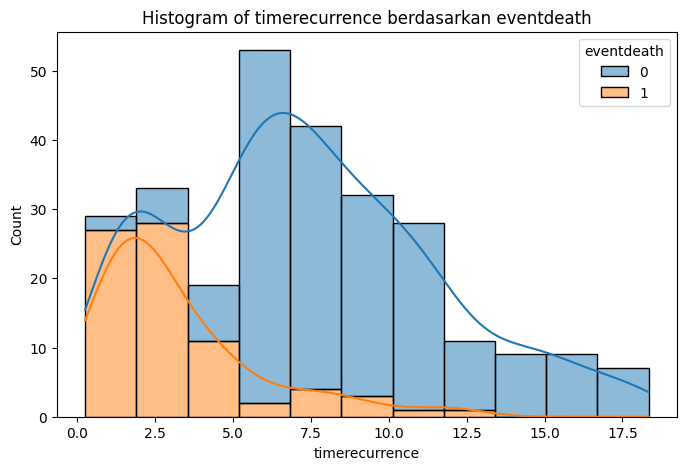

In [ ]:
cols = ['age', 'diam', 'posnodes', 'timerecurrence']

for col in cols:
    plt.figure(figsize=(8,5))
    sns.histplot(data, x=col, hue='eventdeath', kde=True, multiple="stack")
    plt.title(f'Histogram of {col} berdasarkan eventdeath')
    plt.show()



### 4.2 Heatmap Korelasi
Cek hubungan antar variabel numerik menggunakan korelasi Pearson.


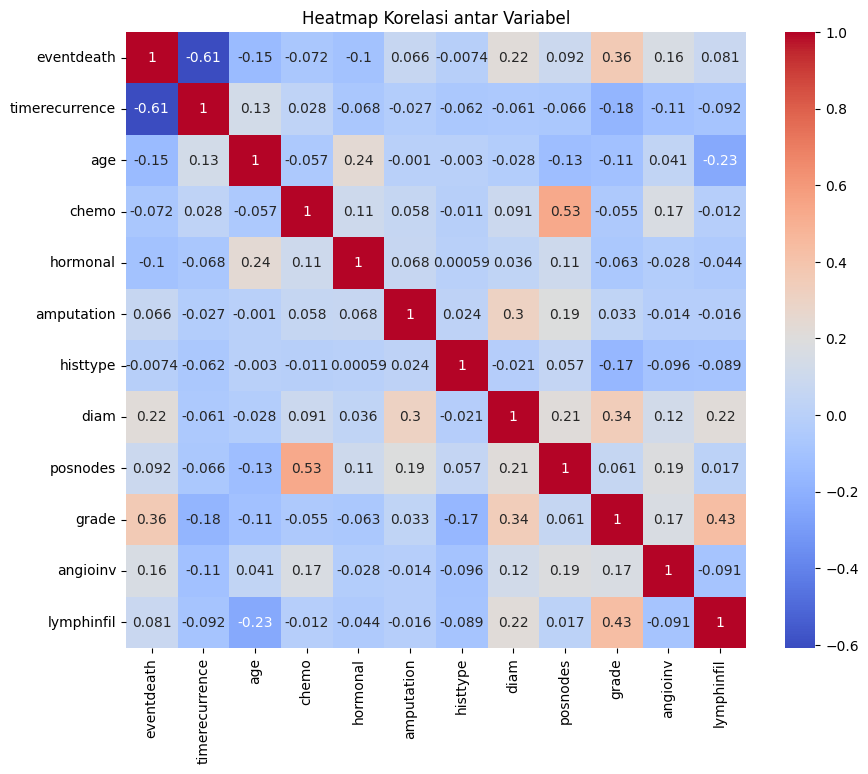

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antar Variabel')
plt.show()


### 4.3 Kaplan-Meier Survival Curve
Menganalisis survival berdasarkan jenis terapi: Chemotherapy, Hormonal, dan Amputation.


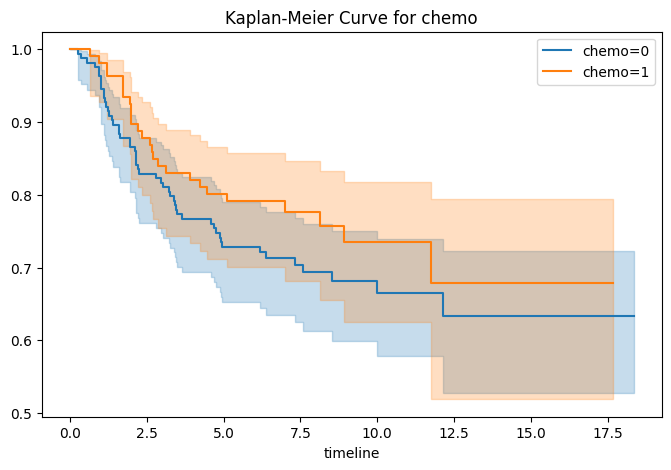

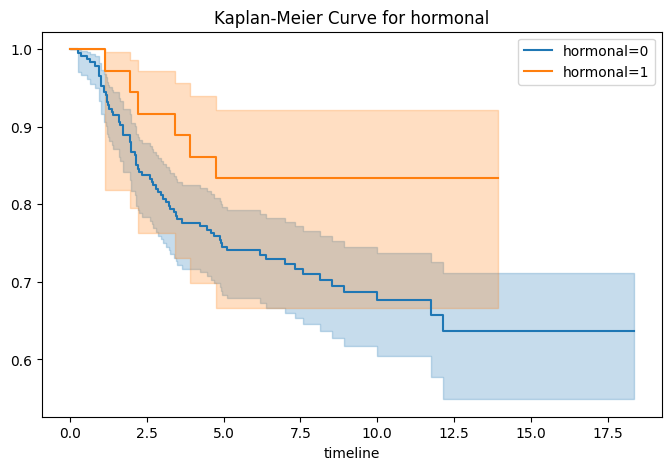

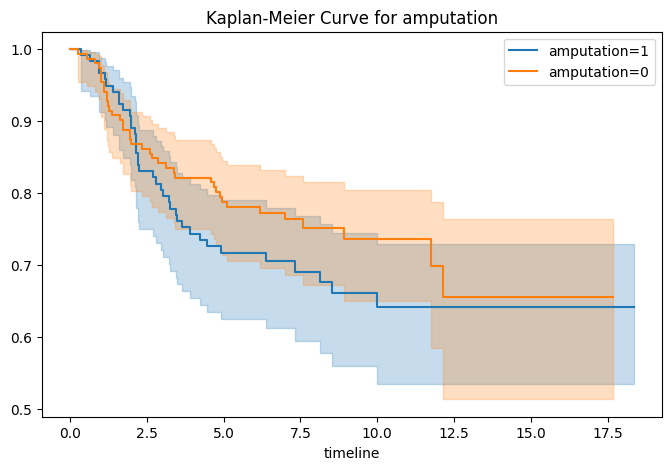

In [ ]:
# Kaplan-Meier Survival Curve
kmf = KaplanMeierFitter()

for var in ['chemo', 'hormonal', 'amputation']:
    plt.figure(figsize=(8,5))
    for group in data[var].unique():
        ix = data[var] == group
        kmf.fit(data.loc[ix, 'timerecurrence'], data.loc[ix, 'eventdeath'], label=f'{var}={group}')
        kmf.plot_survival_function()
    plt.title(f'Kaplan-Meier Curve for {var}')
    plt.show()



## 5. Uji Asumsi Proportional Hazard


In [ ]:
# Uji asumsi proportional hazard
cph_test = CoxPHFitter()
cph_test.fit(data, duration_col='timerecurrence', event_col='eventdeath')
results = proportional_hazard_test(cph_test, data, time_transform='rank')
results.summary


,test_statistic,p,-log2(p)
age,3.082844,0.079122,3.659776
amputation,0.481154,0.487900,1.035343
angioinv,1.954417,0.162112,2.624940
chemo,0.116482,0.732881,0.448348
diam,0.112177,0.737679,0.438936
grade,4.283034,0.038495,4.699201
histtype,2.716194,0.099335,3.331560
hormonal,0.201651,0.653392,0.613980
lymphinfil,0.007880,0.929265,0.105838
posnodes,0.593137,0.441208,1.180468


Variabel yang melanggar asumsi adalah variabel dengan nilai p-value <0.05. Pada tabel diatas, variabel yang melanggar asumsi adalah variabel `grade`.


## 6. Modeling Cox


### 6.1 Stratified Cox Model
Karena variabel `grade` melanggar asumsi PH, maka dibuat stratifikasi berdasarkan `grade`.

In [ ]:
# Stratified Cox Model
cph_stratified = CoxPHFitter()
cph_stratified.fit(data, duration_col='timerecurrence', event_col='eventdeath', strata=['grade'])
cph_stratified.print_summary()

<lifelines.CoxPHFitter: fitted with 272 total observations, 195 right-censored observations>
             duration col = 'timerecurrence'
                event col = 'eventdeath'
                   strata = grade
      baseline estimation = breslow
   number of observations = 272
number of events observed = 77
   partial log-likelihood = -317.11
         time fit was run = 2025-05-20 03:51:06 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
age        -0.05      0.95      0.02           -0.10           -0.01                0.91                0.99
chemo      -0.55      0.58      0.31           -1.15            0.05                0.32                1.05
hormonal   -0.28      0.76      0.45           -1.16            0.61                0.31                1.83
amputation -0.01      0.99      0.25           -0.50            0.48                0.61                1.62
histtype    0.54      1.71      0.21            0.13            0.94                1.14                2.57
diam        0.02      1.02      0.01           -0.00            0.05                1.00                1.05
posnodes    0.08      1.08      0.06           -0.03            0.19                0.97                1.21
angioinv    0.21      1.24      0.14           -0.06            0.48                0.95                1.62
lymphinfil -0.29      0.75      0.20           -0.69            0.11                0.50                1.11

            cmp to     z    p  -log2(p)
covariate                              
age           0.00 -2.47 0.01      6.21
chemo         0.00 -1.81 0.07      3.82
hormonal      0.00 -0.61 0.54      0.89
amputation    0.00 -0.04 0.97      0.04
histtype      0.00  2.57 0.01      6.62
diam          0.00  1.62 0.11      3.24
posnodes      0.00  1.45 0.15      2.76
angioinv      0.00  1.55 0.12      3.06
lymphinfil    0.00 -1.43 0.15      2.71
---
Concordance = 0.66
Partial AIC = 652.22
log-likelihood ratio test = 22.70 on 9 df
-log2(p) of ll-ratio test = 7.18


### 6.2 Extended Cox Model
Extended Cox digunakan untuk memasukkan `grade` sebagai variabel yang bergantung waktu.


In [ ]:
# Extended Cox Model
data['grade_timerecurrence'] = data['grade'] * data['timerecurrence']
cph_extended = CoxPHFitter()
cph_extended.fit(data, duration_col='timerecurrence', event_col='eventdeath')
cph_extended.print_summary()

<lifelines.CoxPHFitter: fitted with 272 total observations, 195 right-censored observations>
             duration col = 'timerecurrence'
                event col = 'eventdeath'
      baseline estimation = breslow
   number of observations = 272
number of events observed = 77
   partial log-likelihood = -215.51
         time fit was run = 2025-05-20 03:51:07 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                             
age                  -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
chemo                -0.18      0.84      0.35           -0.87            0.51                0.42                1.67
hormonal             -0.53      0.59      0.47           -1.45            0.39                0.24                1.47
amputation           -0.03      0.98      0.26           -0.53            0.48                0.59                1.62
histtype              0.06      1.07      0.21           -0.35            0.48                0.71                1.61
diam                 -0.01      0.99      0.01           -0.04            0.02                0.96                1.02
posnodes              0.03      1.03      0.07           -0.10            0.16                0.90                1.17
grade                 4.68    107.42      0.49            3.72            5.63               41.39              278.80
angioinv              0.11      1.12      0.14           -0.16            0.39                0.85                1.47
lymphinfil           -0.36      0.70      0.20           -0.76            0.04                0.47                1.04
grade_timerecurrence -0.78      0.46      0.09           -0.95           -0.61                0.39                0.55

                      cmp to     z      p  -log2(p)
covariate                                          
age                     0.00 -0.38   0.70      0.51
chemo                   0.00 -0.50   0.61      0.70
hormonal                0.00 -1.14   0.26      1.96
amputation              0.00 -0.10   0.92      0.12
histtype                0.00  0.30   0.76      0.39
diam                    0.00 -0.60   0.55      0.86
posnodes                0.00  0.41   0.68      0.55
grade                   0.00  9.61 <0.005     70.24
angioinv                0.00  0.83   0.41      1.29
lymphinfil              0.00 -1.78   0.08      3.73
grade_timerecurrence    0.00 -8.85 <0.005     60.00
---
Concordance = 0.98
Partial AIC = 453.01
log-likelihood ratio test = 388.27 on 11 df
-log2(p) of ll-ratio test = 251.55


## 7. Perbandingan AIC
Model terbaik adalah yang memiliki nilai **AIC** paling kecil.


In [ ]:
print(f"AIC Stratified Cox Model: {cph_stratified.AIC_partial_}")
print(f"AIC Extended Cox Model: {cph_extended.AIC_partial_}")

if cph_extended.AIC_partial_ < cph_stratified.AIC_partial_:
    print("=> Model Extended Cox lebih baik berdasarkan AIC.")
else:
    print("=> Model Stratified Cox lebih baik berdasarkan AIC.")


AIC Stratified Cox Model: 652.2163019929721
AIC Extended Cox Model: 453.01282299254507
=> Model Extended Cox lebih baik berdasarkan AIC.


# **Analisis Survival pada Pasien Kanker Payudara + data hasil PCA**


## 1. Load Dataset

In [ ]:
# Load data
data = pd.read_csv('NKI_cleaned.csv')
data.head()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,barcode,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,Contig19551,Contig47230_RC,Contig46501_RC,Contig20749_RC,AL157500,AL157502,Contig37376_RC,Contig45395_RC,X98307,AL157505,AB033027,Contig24026_RC,Contig27800_RC,Contig42500_RC,Contig7147,...,NM_001505,NM_001511,NM_002245,NM_018901,NM_002250,NM_001523,NM_018910,NM_000802,NM_002266,NM_001540,NM_002274,NM_001546,NM_002275,NM_002276,NM_001548,Contig51486_RC,NM_000824,NM_001554,NM_000826,NM_001555,NM_018942,NM_001565,NM_002299,NM_018950,NM_018952,Contig55606_RC,D25217,NM_000846,NM_000849,Contig29022_RC,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,25,0,2,3,1,6274,-0.413955,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,-0.565482,0.159871,0.198546,0.131750,0.600214,0.034498,0.492915,0.032284,0.020498,0.162939,-0.026182,0.090109,-0.110716,0.025322,0.690928,...,-0.129174,-0.440579,0.091784,-0.385110,-0.289255,-0.485699,-0.405309,-0.109878,-0.472279,-0.331498,-0.358591,-0.070151,-0.145741,-0.247676,-0.551571,-0.201436,-0.323253,-0.031295,-0.596451,-0.891091,-0.099162,-0.721029,-0.071294,-0.399346,0.393402,-0.301836,-0.271553,-0.383663,0.278246,-0.216583,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,20,0,3,3,1,6275,0.195251,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,0.118127,-0.183824,0.265609,-0.080799,-0.034788,0.146600,0.096864,0.043611,0.049600,0.150307,-0.150096,-0.082436,-0.117535,-0.245531,-0.070265,...,-0.208322,-0.375427,-0.564630,0.200229,-0.256182,-0.157249,0.165127,-0.321392,-0.218458,-0.026051,-0.170069,-0.201066,-0.490440,0.089429,-0.352569,0.007789,0.171152,-0.074320,0.716055,-0.489632,-0.237086,-0.074905,-0.122872,-0.020308,-0.250971,0.291171,-0.263896,-0.348006,-0.172679,0.224676,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,15,0,2,1,1,6276,0.596177,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,0.128750,0.403489,0.161287,0.030411,-0.074798,-0.190267,0.111516,-0.212994,-0.083166,0.363167,-0.202888,0.037665,-0.061916,0.082368,0.048723,...,0.179152,-0.470602,-0.080452,0.611942,-0.018856,0.170203,0.609129,-0.080603,-0.255806,-0.233129,0.251981,0.583411,0.827428,-1.056209,-0.068477,0.011319,-0.037401,-0.479714,0.774578,-0.256280,-0.010993,-0.445192,-0.191234,-0.088751,-0.200597,0.355198,-0.363763,-0.364457,0.211452,0.519197,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,15,1,2,3,1,6277,0.501286,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,-0.020820,-0.189779,-0.003238,0.450045,-0.024921,-0.187729,0.012188,-0.110403,-0.036232,-0.014174,-0.192298,-0.116583,-0.117127,-0.082694,-0.005107,...,-0.131830,-0.423847,-0.732862,-0.437769,-0.337763,-0.230526,-0.371917,-0.148544,-0.554392,-0.436530,-0.298767,-0.292425,-0.658711,0.188053,-0.361884,0.263228,0.155554,-0.136231,-0.139935,-0.646764,-0.231747,-0.461515,-0.231232,-0.180521,0.160247,-0.400131,-0.429229,-0.382146,0.189681,-0.115396,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,15,0,2,2,1,6278,-0.066771,-0.982276,-0.514666,-0.118483,-0.086523,-0.377659,-0.093353,0.302795,-0.794573,-0.001558,-0.210314,0.046650,-0.151043,-0.016541,-0.168022,0.048334,-0.049165,-0.060926,-0.060485,-0.061257,-0.018171,-0.057568,0.033263,0.070836,...,0.281523,-0.318070,-0.171916,0.064884,-0.261164,0.163015,0.057460,-0.190698,-0.144005,0.430455,-0.313115,0.141877,-0.7


## 2. Data Preprocessing


In [ ]:
data_pca = data.iloc[:, 16:]
data_pca

,esr1,G3PDH_570,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig56678_RC,Contig53047_RC,Contig19551,Contig47230_RC,Contig46501_RC,Contig20749_RC,AL157500,AL157502,Contig37376_RC,Contig45395_RC,X98307,AL157505,AB033027,Contig24026_RC,Contig27800_RC,Contig42500_RC,Contig7147,Contig32037_RC,Contig16374_RC,Contig42349_RC,Contig33976_RC,Contig49874_RC,AB033060,U45975,M34428,AB033083,NM_003004,Contig7192,Contig23039_RC,Contig22685_RC,D84140,Contig43806_RC,NM_003022,...,NM_001505,NM_001511,NM_002245,NM_018901,NM_002250,NM_001523,NM_018910,NM_000802,NM_002266,NM_001540,NM_002274,NM_001546,NM_002275,NM_002276,NM_001548,Contig51486_RC,NM_000824,NM_001554,NM_000826,NM_001555,NM_018942,NM_001565,NM_002299,NM_018950,NM_018952,Contig55606_RC,D25217,NM_000846,NM_000849,Contig29022_RC,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,-0.413955,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,-0.565482,0.159871,0.198546,0.131750,0.600214,0.034498,0.492915,0.032284,0.020498,0.162939,-0.026182,0.090109,-0.110716,0.025322,0.690928,0.764825,0.579042,0.039256,-0.112008,-0.014334,0.012805,0.746400,-0.020099,-0.070284,-0.410170,0.139930,0.313297,0.645509,-0.122269,-0.082007,0.351892,...,-0.129174,-0.440579,0.091784,-0.385110,-0.289255,-0.485699,-0.405309,-0.109878,-0.472279,-0.331498,-0.358591,-0.070151,-0.145741,-0.247676,-0.551571,-0.201436,-0.323253,-0.031295,-0.596451,-0.891091,-0.099162,-0.721029,-0.071294,-0.399346,0.393402,-0.301836,-0.271553,-0.383663,0.278246,-0.216583,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,0.195251,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,0.118127,-0.183824,0.265609,-0.080799,-0.034788,0.146600,0.096864,0.043611,0.049600,0.150307,-0.150096,-0.082436,-0.117535,-0.245531,-0.070265,0.046395,0.055705,0.088564,-0.090754,-0.200864,-0.071210,-0.418519,-0.105610,-0.072491,0.086513,-0.014931,-0.060254,0.005230,-0.151410,-0.282336,0.023717,...,-0.208322,-0.375427,-0.564630,0.200229,-0.256182,-0.157249,0.165127,-0.321392,-0.218458,-0.026051,-0.170069,-0.201066,-0.490440,0.089429,-0.352569,0.007789,0.171152,-0.074320,0.716055,-0.489632,-0.237086,-0.074905,-0.122872,-0.020308,-0.250971,0.291171,-0.263896,-0.348006,-0.172679,0.224676,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,0.596177,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,0.128750,0.403489,0.161287,0.030411,-0.074798,-0.190267,0.111516,-0.212994,-0.083166,0.363167,-0.202888,0.037665,-0.061916,0.082368,0.048723,-0.030065,0.166866,-0.145519,-0.039055,0.108837,0.037011,-0.117579,-0.096034,-0.056609,-0.076556,0.258624,0.101771,0.137174,-0.160126,0.024189,0.082768,...,0.179152,-0.470602,-0.080452,0.611942,-0.018856,0.170203,0.609129,-0.080603,-0.255806,-0.233129,0.251981,0.583411,0.827428,-1.056209,-0.068477,0.011319,-0.037401,-0.479714,0.774578,-0.256280,-0.010993,-0.445192,-0.191234,-0.088751,-0.200597,0.355198,-0.363763,-0.364457,0.211452,0.519197,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,0.501286,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,-0.020820,-0.189779,-0.003238,0.450045,-0.024921,-0.187729,0.012188,-0.110403,-0.036232,-0.014174,-0.192298,-0.116583,-0.117127,-0.082694,-0.005107,-0.074346,0.090662,0.214941,-0.114225,-0.112160,-0.108567,-0.192184,-0.090999,-0.093462,-0.587146,0.095157,0.029532,0.038152,-0.055742,-0.056952,-0.234063,...,-0.131830,-0.423847,-0.732862,-0.437769,-0.337763,-0.230526,-0.371917,-0.148544,-0.554392,-0.436530,-0.298767,-0.292425,-0.658711,0.188053,-0.361884,0.263228,0.155554,-0.136231,-0.139935,-0.646764,-0.231747,-0.461515,-0.231232,-0.180521,0.160247,-0.400131,-0.429229,-0.382146,0.189681,-0.115396,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.01679

In [ ]:
# Cek info data
print(data_pca.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Columns: 1554 entries, esr1 to AF067420
dtypes: float64(1554)
memory usage: 3.2 MB
None


In [ ]:
# Cek missing values
print(data_pca.isnull().sum())

esr1              0
G3PDH_570         0
Contig45645_RC    0
Contig44916_RC    0
D25272            0
                 ..
Contig29014_RC    0
Contig46616_RC    0
NM_000888         0
NM_000898         0
AF067420          0
Length: 1554, dtype: int64


### PCA

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

In [ ]:
pca_full = PCA()
data_pca_full = pca_full.fit_transform(data_scaled)

Text(0, 0.5, 'Explained Variance Ratio')

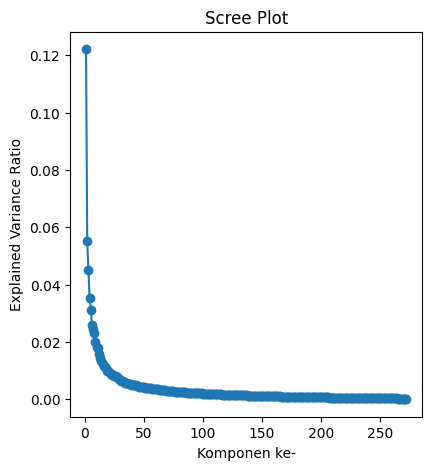

In [ ]:
# Plot 1: Explained Variance Ratio Plot
explained_var = pca_full.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Scree Plot")
plt.xlabel("Komponen ke-")
plt.ylabel("Explained Variance Ratio")

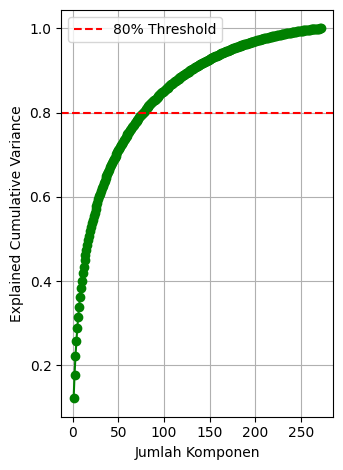

In [ ]:
# Plot 2: Cumulative Explained Variance Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', color='green', linestyle='-')

plt.xlabel("Jumlah Komponen")
plt.ylabel("Explained Cumulative Variance")
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# kumulatif varians
threshold = 0.8
n_components = np.argmax(cumulative_var >= threshold) + 1
print(f"Jumlah komponen untuk menjelaskan ≥{threshold*100}% variansi: {n_components}")

Jumlah komponen untuk menjelaskan ≥80.0% variansi: 77


In [ ]:
# eigen
eigenvalues = pca_full.explained_variance_
n_components_eigen = np.sum(eigenvalues > 1)
print(f"Jumlah komponen dengan eigenvalue > 1: {n_components_eigen}")

Jumlah komponen dengan eigenvalue > 1: 200


In [ ]:
# melakukan pca 77 komponen
pca = PCA(n_components=77)
X_pca = pca.fit_transform(data_scaled)

In [ ]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 78)])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77
0,12.364424,4.064728,0.820998,-1.035348,0.067862,4.544573,1.567310,-1.610517,-1.758947,-2.770288,0.684207,0.140305,8.262988,6.857463,1.035502,-5.571848,0.658742,-1.664339,5.043560,2.385367,0.702840,0.118718,3.365211,0.078279,4.154349,-1.821825,-1.800121,-1.705965,-1.648261,-0.986662,-1.234154,-1.472871,-1.871029,2.519867,4.010880,1.944279,3.082449,0.245520,1.910204,-1.127601,-0.152565,1.997167,0.203078,1.354217,0.385839,-1.629400,5.764971,0.056574,3.029905,1.721007,-2.781794,-2.533309,1.008708,2.119220,0.408656,1.481307,-1.442247,3.109887,-1.117886,2.623775,-0.499660,1.412456,2.091238,4.161229,-2.629620,-0.566043,-2.158184,-1.336547,-3.444955,-0.277854,-1.232500,2.277806,2.873275,-2.128255,-1.212210,-0.389070,-2.731814
1,11.025289,3.795677,-1.737387,1.322806,2.156427,-5.912862,4.186256,3.576677,6.426338,-3.159235,4.830527,-0.191950,-6.872241,-3.057391,0.086512,2.745687,0.093783,-0.223396,-1.491805,2.502742,-4.813909,4.189186,-1.276012,-2.868739,2.019171,1.160233,-2.468241,1.710585,0.267198,-0.940330,-2.470377,0.429862,-0.439770,-1.349832,-3.626177,2.551527,0.435185,-0.651519,-1.935903,-3.033848,-3.051376,-1.215986,-0.601583,0.572018,-3.025508,-0.312561,0.106497,1.331676,-0.523472,0.284928,1.255219,-1.311457,-0.892912,0.807438,-1.906836,-1.843357,1.431297,0.500048,-0.409343,-0.678700,0.575059,2.020896,-2.367796,-0.873191,0.762172,0.773179,-4.387658,0.571605,0.139684,-0.465757,2.346369,1.240203,-0.038758,-0.414115,1.926735,0.209602,-1.596160
2,13.135728,3.058892,-0.030500,0.483981,-5.336811,-4.131810,2.341492,-2.076439,4.177083,2.418882,4.288381,0.780499,-2.261109,-1.585109,-2.708868,2.502461,-1.530107,-3.908480,2.917625,5.460704,-2.947509,4.632735,0.387582,-3.790192,-1.893688,1.700273,0.187920,-0.900774,-1.145814,-1.350873,-0.198308,-2.056063,3.202318,1.181124,-2.303082,1.183538,-3.607262,-0.415591,-0.712085,-3.467855,-3.869605,-2.506321,-1.154350,-1.048123,-2.381341,-1.229943,-1.962337,3.315442,-0.886305,-0.201747,-1.580282,-0.549425,-1.029990,2.394313,-2.031203,-0.827921,0.852745,1.712782,-0.745930,1.349712,2.106530,0.324616,-2.395585,2.596209,-0.779748,-1.248080,-3.942410,3.072557,1.873758,-1.316973,0.240975,0.248963,2.239752,0.580719,-1.634033,-0.067307,2.078787
3,14.455227,-2.617116,-1.153033,-8.622669,0.448913,3.749867,13.918654,-0.482131,8.999648,-1.818158,2.343619,1.532438,-1.866237,2.336468,-0.893291,-0.752458,-0.341439,3.130307,4.596186,-0.110943,-4.549391,-2.136069,4.384883,0.391430,3.156329,2.737829,0.351582,3.094031,-0.113705,3.339367,-3.516394,3.214755,-4.714217,-2.629218,1.451102,0.480147,5.641936,-2.164482,-2.408030,-3.427170,0.898247,0.349650,-3.170276,-0.644569,-2.127806,0.476644,-1.777946,1.293187,0.307333,-0.700389,-2.467375,-1.788044,2.293345,1.890604,-1.730613,-3.830413,1.250525,2.268730,-3.479005,-1.530217,1.557231,-0.004143,-2.395917,-1.251927,0.984153,0.959745,-0.216447,0.327543,1.034236,-0.158167,0.545582,-1.450268,2.693782,-3.455189,1.597843,-2.684129,-1.734752
4,6.153006,-10.228358,-0.097260,-0.745454,4.467325,-6.573367,5.757993,2.411385,-1.141126,4.305231,2.609085,2.871837,-3.401442,-4.542660,-4.715560,3.189284,-3.527209,-0.728899,0.954826,-0.607082,-3.034874,-2.558100,5.593276,2.300978,2.791219,-1.980290,-0.814851,-1.462459,0.539947,-1.759931,2.214493,0.499835,-1.973098,1.403934,-0.877607,1.791113,2.383412,-1.368544,1.725301,-1.244994,0.132323,2.090348,-1.286958,-0.955044,-1.172761,-0.595471,-2.961721,-2.893938,1.224707,-2.055386,-1.413021,-0.645150,-1.019464,1.018786,1.161741,1.195900,-0.009657,-1.607719,-1.106605,-0.750902,-0.708283,1.229945,-1.357185,-2.557896,0.058376,1.980755,-0.926391,-1.767057,0.926725,-1.640831,-0.701566

### Gabungin var utama + pca

In [ ]:
# Ini 12 data penting yg dipakai
ekstrak_kolom = [
    'eventdeath',
    'timerecurrence',
    'age',
    'chemo',
    'hormonal',
    'amputation',
    'histtype',
    'diam',
    'posnodes',
    'grade',
    'angioinv',
    'lymphinfil'
]

data = data[ekstrak_kolom]

In [ ]:
# ini digabungin hasil pca sama data
data_pca = pd.concat([data.reset_index(drop=True), df_pca], axis=1)
data_pca

,eventdeath,timerecurrence,age,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77
0,0,14.817248,43,0,0,1,1,25,0,2,3,1,12.364424,4.064728,0.820998,-1.035348,0.067862,4.544573,1.567310,-1.610517,-1.758947,-2.770288,0.684207,0.140305,8.262988,6.857463,1.035502,-5.571848,0.658742,-1.664339,5.043560,2.385367,0.702840,0.118718,3.365211,0.078279,4.154349,-1.821825,-1.800121,-1.705965,...,0.245520,1.910204,-1.127601,-0.152565,1.997167,0.203078,1.354217,0.385839,-1.629400,5.764971,0.056574,3.029905,1.721007,-2.781794,-2.533309,1.008708,2.119220,0.408656,1.481307,-1.442247,3.109887,-1.117886,2.623775,-0.499660,1.412456,2.091238,4.161229,-2.629620,-0.566043,-2.158184,-1.336547,-3.444955,-0.277854,-1.232500,2.277806,2.873275,-2.128255,-1.212210,-0.389070,-2.731814
1,0,14.261465,48,0,0,0,1,20,0,3,3,1,11.025289,3.795677,-1.737387,1.322806,2.156427,-5.912862,4.186256,3.576677,6.426338,-3.159235,4.830527,-0.191950,-6.872241,-3.057391,0.086512,2.745687,0.093783,-0.223396,-1.491805,2.502742,-4.813909,4.189186,-1.276012,-2.868739,2.019171,1.160233,-2.468241,1.710585,...,-0.651519,-1.935903,-3.033848,-3.051376,-1.215986,-0.601583,0.572018,-3.025508,-0.312561,0.106497,1.331676,-0.523472,0.284928,1.255219,-1.311457,-0.892912,0.807438,-1.906836,-1.843357,1.431297,0.500048,-0.409343,-0.678700,0.575059,2.020896,-2.367796,-0.873191,0.762172,0.773179,-4.387658,0.571605,0.139684,-0.465757,2.346369,1.240203,-0.038758,-0.414115,1.926735,0.209602,-1.596160
2,0,6.644764,38,0,0,0,1,15,0,2,1,1,13.135728,3.058892,-0.030500,0.483981,-5.336811,-4.131810,2.341492,-2.076439,4.177083,2.418882,4.288381,0.780499,-2.261109,-1.585109,-2.708868,2.502461,-1.530107,-3.908480,2.917625,5.460704,-2.947509,4.632735,0.387582,-3.790192,-1.893688,1.700273,0.187920,-0.900774,...,-0.415591,-0.712085,-3.467855,-3.869605,-2.506321,-1.154350,-1.048123,-2.381341,-1.229943,-1.962337,3.315442,-0.886305,-0.201747,-1.580282,-0.549425,-1.029990,2.394313,-2.031203,-0.827921,0.852745,1.712782,-0.745930,1.349712,2.106530,0.324616,-2.395585,2.596209,-0.779748,-1.248080,-3.942410,3.072557,1.873758,-1.316973,0.240975,0.248963,2.239752,0.580719,-1.634033,-0.067307,2.078787
3,0,7.748118,50,0,1,0,1,15,1,2,3,1,14.455227,-2.617116,-1.153033,-8.622669,0.448913,3.749867,13.918654,-0.482131,8.999648,-1.818158,2.343619,1.532438,-1.866237,2.336468,-0.893291,-0.752458,-0.341439,3.130307,4.596186,-0.110943,-4.549391,-2.136069,4.384883,0.391430,3.156329,2.737829,0.351582,3.094031,...,-2.164482,-2.408030,-3.427170,0.898247,0.349650,-3.170276,-0.644569,-2.127806,0.476644,-1.777946,1.293187,0.307333,-0.700389,-2.467375,-1.788044,2.293345,1.890604,-1.730613,-3.830413,1.250525,2.268730,-3.479005,-1.530217,1.557231,-0.004143,-2.395917,-1.251927,0.984153,0.959745,-0.216447,0.327543,1.034236,-0.158167,0.545582,-1.450268,2.693782,-3.455189,1.597843,-2.684129,-1.734752
4,0,6.318960,38,0,0,1,1,15,0,2,2,1,6.153006,-10.228358,-0.097260,-0.745454,4.467325,-6.573367,5.757993,2.411385,-1.141126,4.305231,2.609085,2.871837,-3.401442,-4.542660,-4.715560,3.189284,-3.527209,-0.728899,0.954826,-0.607082,-3.034874,-2.558100,5.593276,2.300978,2.791219,-1.980290,-0.814851,-1.462459,...,-1.368544,1.725301,-1.244994,0.132323,2.090348,-1.286958,-0.955044,-1.172761,-0.595471,-2.961721,-2.893938,1.224707,-2.055386,-1.413021,-0.645150,-1.019464,1.018786,1.161741,1.195900,-0.009657,-1.607719,-1.106605,-0.750902,-0.708283,1.229945,-1.357185,-2.557896,0.058376,1.980755,-0.926391,-1.767057,0.926725,-1.640831,-0.701566,0.863859,0.303509,-0.480778,-0.177512,-3.041002,0.211035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## 3. Statistik Deskriptif
Melihat ringkasan statistik variabel numerik untuk memahami distribusi datanya.


In [ ]:
data_pca.describe()

,eventdeath,timerecurrence,age,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,...,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,272.000000,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,272.000000,2.720000e+02,2.720000e+02,2.720000e+02,272.000000,2.720000e+02,2.720000e+02,272.000000,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02,2.720000e+02
mean,0.283088,7.250433,44.047794,0.393382,0.132353,0.441176,1.110294,22.529412,1.341912,2.128676,1.647059,1.261029,2.089832e-16,-2.089832e-16,-2.089832e-16,-3.134747e-16,-1.044916e-16,2.220446e-16,-1.567374e-16,2.089832e-16,1.044916e-16,2.089832e-16,2.089832e-16,7.836868e-17,1.959217e-16,7.836868e-17,1.567374e-16,2.612289e-17,-3.918434e-17,5.224579e-17,4.571507e-17,2.612289e-17,-3.134747e-16,1.567374e-16,-2.089832e-16,-2.449021e-16,2.612289e-17,-2.612289e-17,-1.044916e-16,1.306145e-17,...,7.836868e-17,-2.612289e-17,1.436759e-16,-6.530724e-17,-1.142877e-16,1.436759e-16,-5.224579e-17,0.000000,1.436759e-16,1.306145e-16,1.306145e-17,-5.224579e-17,-1.697988e-16,-3.918434e-17,1.306145e-16,-1.567374e-16,3.918434e-17,-2.285753e-16,0.000000,-1.306145e-17,9.143013e-17,-5.224579e-17,0.000000,4.898043e-18,1.175530e-16,0.000000,1.273491e-16,1.175530e-16,5.224579e-17,-2.612289e-17,-6.530724e-17,5.224579e-17,7.183796e-17,1.763295e-16,-1.028589e-16,-2.155139e-16,-1.175530e-16,9.469549e-17,-1.567374e-16,-1.110223e-16
std,0.451329,4.177462,5.464538,0.489401,0.339499,0.497443,0.545668,8.703345,2.108848,0.797821,0.876334,0.596629,1.380275e+01,9.294392e+00,8.392471e+00,7.435879e+00,6.980647e+00,6.336386e+00,6.183291e+00,6.020958e+00,5.592548e+00,5.320538e+00,5.267261e+00,4.984829e+00,4.749551e+00,4.566809e+00,4.400001e+00,4.230459e+00,4.173059e+00,4.092769e+00,3.940365e+00,3.903973e+00,3.777076e+00,3.681971e+00,3.643116e+00,3.613737e+00,3.576508e+00,3.554161e+00,3.454636e+00,3.420090e+00,...,2.857421e+00,2.851182e+00,2.820986e+00,2.796799e+00,2.770170e+00,2.746980e+00,2.695615e+00,2.688151,2.612153e+00,2.601738e+00,2.587709e+00,2.552495e+00,2.530125e+00,2.512360e+00,2.494590e+00,2.473819e+00,2.441963e+00,2.436909e+00,2.420857,2.398883e+00,2.371948e+00,2.353580e+00,2.316083,2.300491e+00,2.297277e+00,2.269925,2.254543e+00,2.239623e+00,2.210763e+00,2.189430e+00,2.160653e+00,2.139712e+00,2.126722e+00,2.114676e+00,2.095640e+00,2.072853e+00,2.042504e+00,2.035982e+00,2.012475e+00,1.989123e+00
min,0.000000,0.271047,26.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,-3.828171e+01,-2.473281e+01,-4.282136e+01,-3.792376e+01,-3.194471e+01,-1.903068e+01,-1.713792e+01,-1.896124e+01,-2.188514e+01,-2.609522e+01,-3.402418e+01,-4.166987e+01,-2.108901e+01,-2.558795e+01,-1.683553e+01,-1.745837e+01,-2.457987e+01,-1.813659e+01,-1.864338e+01,-2.012439e+01,-8.395637e+00,-1.895100e+01,-1.305103e+01,-2.275677e+01,-1.693642e+01,-1.427401e+01,-1.606955e+01,-1.426933e+01,...,-1.154079e+01,-9.504227e+00,-9.6


## 4. Exploratory Data Analysis (EDA)


### 4.1 Histogram Survival
Distribusi PC berdasarkan status kematian (eventdeath).

In [ ]:
cols = [f'PC{i}' for i in range(1, 78)]

for col in cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_pca, x=col, hue='eventdeath', kde=True, multiple="stack")
    plt.title(f'Histogram of {col} berdasarkan eventdeath')
    plt.tight_layout()
    plt.show()


### 4.2 Cek Korelasi Antar Variabel
Cek hubungan antar variabel numerik menggunakan korelasi Pearson.


In [ ]:
df_korelasi = data_pca.drop(columns=['eventdeath'], errors='ignore')

corr_matrix = df_korelasi.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2])
                   for col1 in upper.columns
                   for col2 in upper.index
                   if pd.notnull(upper.loc[col2, col1]) and upper.loc[col2, col1] > 0.85]

if high_corr_pairs:
    print("Variabel dengan korelasi > 0.85:")
    for c1, c2, val in high_corr_pairs:
        print(f"{c1} & {c2}: {val:.3f}")
else:
    print("Tidak ada variabel dengan korelasi tinggi (>0.85).")


Tidak ada variabel dengan korelasi tinggi (>0.85).



## 5. Uji Asumsi Proportional Hazard


In [ ]:
cph_test = CoxPHFitter()
cph_test.fit(data_pca, duration_col='timerecurrence', event_col='eventdeath')

results = proportional_hazard_test(cph_test, data_pca, time_transform='rank')

summary_df = results.summary

# Filter p-value < 0.05 (melanggar asumsi PH)
vars_p_less_05 = summary_df[summary_df['p'] < 0.05]

if vars_p_less_05.empty:
    print("Tidak ada variabel dengan p-value < 0.05 (semua memenuhi asumsi PH)")
else:
    print("Variabel dengan p-value < 0.05 (melanggar asumsi PH):")
    for var_name, row in vars_p_less_05.iterrows():
        print(f"{var_name}: p-value = {row['p']:.4f}")


Variabel dengan p-value < 0.05 (melanggar asumsi PH):
PC10: p-value = 0.0224
PC25: p-value = 0.0331
PC36: p-value = 0.0489
PC66: p-value = 0.0488
angioinv: p-value = 0.0281



## 6. Modeling Cox


### Stratified Cox Model
Karena beberapa variabel melanggar asumsi PH, maka dibuat stratifikasi berdasarkan variabel yang kategorikal.

In [ ]:
cph_stratified = CoxPHFitter()
cph_stratified.fit(data, duration_col='timerecurrence', event_col='eventdeath', strata=['angioinv'])
cph_stratified.print_summary()

<lifelines.CoxPHFitter: fitted with 272 total observations, 195 right-censored observations>
             duration col = 'timerecurrence'
                event col = 'eventdeath'
                   strata = angioinv
      baseline estimation = breslow
   number of observations = 272
number of events observed = 77
   partial log-likelihood = -293.96
         time fit was run = 2025-05-25 14:51:17 UTC

---
            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                   
age        -0.12      0.89      0.04           -0.19           -0.04                0.83                0.96
chemo      -0.91      0.40      0.51           -1.91            0.09                0.15                1.09
hormonal    0.21      1.24      0.76           -1.28            1.70                0.28                5.47
amputation -0.06      0.94      0.47           -0.97            0.85                0.38                2.35
histtype    0.31      1.37      0.36           -0.39            1.01                0.68                2.75
diam        0.02      1.02      0.03           -0.03            0.07                0.97                1.08
posnodes    0.15      1.16      0.10           -0.05            0.35                0.95                1.42
grade       0.32      1.37      0.44           -0.54            1.18                0.58                3.24
lymphinfil -0.66      0.52      0.44           -1.52            0.21                0.22                1.24
PC1        -0.07      0.94      0.02           -0.11           -0.03                0.90                0.98
PC2         0.01      1.01      0.03           -0.05            0.08                0.96                1.08
PC3         0.04      1.04      0.05           -0.06            0.13                0.94                1.14
PC4         0.02      1.03      0.04           -0.05            0.10                0.95                1.11
PC5        -0.04      0.96      0.05           -0.15            0.06                0.86                1.07
PC6        -0.10      0.90      0.08           -0.25            0.05                0.78                1.05
PC7        -0.07      0.94      0.05           -0.17            0.04                0.84                1.04
PC8         0.02      1.02      0.06           -0.10            0.15                0.90                1.16
PC9         0.00      1.00      0.05           -0.10            0.11                0.90                1.12
PC10        0.01      1.01      0.04           -0.08            0.10                0.92                1.10
PC11       -0.04      0.96      0.09           -0.22            0.14                0.81                1.15
PC12        0.10      1.11      0.16           -0.20            0.41                0.82                1.50
PC13       -0.05      0.95      0.08           -0.20            0.10                0.82                1.11
PC14        0.00      1.00      0.08           -0.16            0.16                0.85                1.17
PC15       -0.11      0.90      0.08           -0.25            0.04                0.78                1.04
PC16       -0.06      0.95      0.10           -0.24            0.13                0.79                1.14
PC17        0.19      1.21      0.15           -0.11            0.48                0.90                1.62
PC18       -0.02      0.98      0.08           -0.18            0.13                0.83                1.14
PC19        0.06      1.06      0.08           -0.09            0.21                0.91                1.23
PC20       -0.07      0.93      0.10           -0.27            0.13                0.76                1.14
PC21       -0.08      0.92      0.14           -0.35            0.19                0.70                1.21
PC22       -0.01      0.99      0.09           -0.18            0.16                0.83                

### Extended Cox Model
Extended Cox digunakan untuk memasukkan variabel-variabel yang gagal memenuhi asumsi sebagai variabel yang bergantung waktu dengan menambahkan interaksi antara variabel tersebut dan waktu.

In [ ]:
pc_vars = [col for col in data_pca.columns if col.startswith('PC')]

# Deteksi PC yang gagal dan lolos asumsi
pc_gagal_asumsi = [var for var in pc_vars if var in summary_df.index and summary_df.loc[var, 'p'] < 0.05]
pc_lolos_asumsi = [var for var in pc_vars if var in summary_df.index and summary_df.loc[var, 'p'] >= 0.05]

# Buat variabel time-varying untuk PC yang gagal
for var in pc_gagal_asumsi:
    data_pca[f'{var}_timerecurrence'] = data_pca[var] * data_pca['timerecurrence']

# Buat variabel time-varying untuk angioinv
data_pca['angioinv_timerecurrence'] = data_pca['angioinv'] * data_pca['timerecurrence']

# List variabel non-PC
non_pc_vars = [
    'age',
    'chemo',
    'hormonal',
    'amputation',
    'histtype',
    'diam',
    'posnodes',
    'grade',
    'lymphinfil',
    'angioinv_timerecurrence'
]

non_pc_covariates = [var for var in non_pc_vars if var in data_pca.columns]

# Gabungkan dengan variabel PC (lolos + time-varying)
pc_covariates = pc_lolos_asumsi + [f'{var}_timerecurrence' for var in pc_gagal_asumsi if f'{var}_timerecurrence' in data_pca.columns]

# Gabungkan semua covariates, non-PC dulu
covariates = non_pc_covariates + pc_covariates

cph_ext = CoxPHFitter()
cph_ext.fit(data_pca[covariates + ['timerecurrence', 'eventdeath']], duration_col='timerecurrence', event_col='eventdeath')
cph_ext.print_summary()


<lifelines.CoxPHFitter: fitted with 272 total observations, 195 right-censored observations>
             duration col = 'timerecurrence'
                event col = 'eventdeath'
      baseline estimation = breslow
   number of observations = 272
number of events observed = 77
   partial log-likelihood = -315.59
         time fit was run = 2025-05-25 15:39:56 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
age                      0.01      1.01      0.06           -0.11            0.13                0.89                1.14
chemo                   -0.87      0.42      0.84           -2.52            0.78                0.08                2.18
hormonal                -0.82      0.44      1.05           -2.88            1.23                0.06                3.41
amputation               0.06      1.06      0.80           -1.51            1.63                0.22                5.10
histtype                -0.16      0.85      0.57           -1.27            0.96                0.28                2.61
diam                     0.05      1.05      0.04           -0.03            0.13                0.97                1.13
posnodes                 0.33      1.39      0.15            0.04            0.62                1.04                1.86
grade                    1.89      6.64      0.62            0.68            3.10                1.98               22.25
lymphinfil              -0.52      0.60      0.64           -1.78            0.74                0.17                2.10
angioinv_timerecurrence -0.42      0.66      0.10           -0.62           -0.22                0.54                0.81
PC1                     -0.02      0.98      0.03           -0.08            0.05                0.92                1.05
PC2                      0.02      1.02      0.05           -0.06            0.11                0.94                1.12
PC3                      0.07      1.08      0.11           -0.14            0.29                0.87                1.33
PC4                      0.15      1.16      0.10           -0.05            0.34                0.96                1.40
PC5                      0.03      1.03      0.08           -0.13            0.18                0.88                1.20
PC6                     -0.09      0.91      0.09           -0.27            0.08                0.76                1.09
PC7                      0.13      1.14      0.09           -0.04            0.29                0.96                1.34
PC8                      0.06      1.07      0.08           -0.10            0.23                0.90                1.26
PC9                     -0.03      0.97      0.11           -0.25            0.20                0.78                1.22
PC11                     0.24      1.27      0.19           -0.14            0.61                0.87                1.83
PC12                     0.02      1.02      0.10           -0.18            0.23                0.83                1.26
PC13                    -0.00      1.00      0.15           -0.29            0.29                0.75                1.33
PC14                     0.10      1.11      0.18           -0.25            0.46                0.78                1.58
PC15                    -0.11      0.90      0.11           -0.32            0.11                0.72                1.12
PC16                     0.18      1.20      0.15           -0.11            0.48                0.89                1.61
PC17                     0.23      1.26      0.12           -0.01            0.47                0.99                1.61
PC18                    -0.20      0.82      0.13           -0.45            0.05                0.64                1.05
PC19                     0.20      1.22      0.12           -0.04            0.45          

### CPH plot

<Axes: xlabel='log(HR) (95% CI)'>

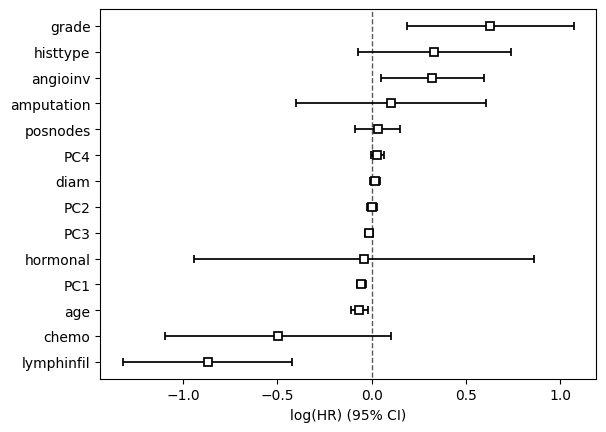

In [ ]:
cph.plot()